In [509]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format #

uri = 'data/outlier_univar.csv'
df = pd.read_csv(uri)
# df.head()
# df.tail(10)
# df.sample(5)
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
7,Bash,26,1.00,2
8,White,25,60.00,1
9,Bob,28,21.00,2


In [510]:
df.dtypes

Name        object
Age          int64
Buy        float64
Section      int64
dtype: object

In [511]:
df.Section = df.Section.astype('category')

In [512]:
df.describe()

,Age,Buy
count,10.00,10.00
mean,26.50,20.20
std,3.63,15.95
min,22.00,1.00
25%,25.00,12.62
50%,25.50,16.50
75%,28.00,20.25
max,35.00,60.00


In [513]:
# ws02
# sns.set_style('whitegrid')
plt.rcParams.update({'font.size':13})

# sns.palplot(sns.color_palette("Set2"))
# current_palette = sns.color_palette()
# current_palette
# sns.palplot(current_palette)

<Axes: >

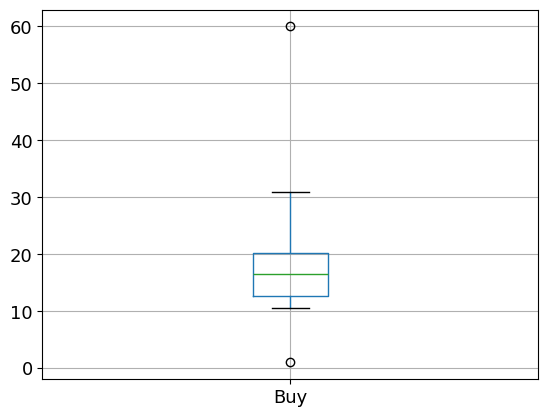

In [514]:
df.boxplot('Buy')

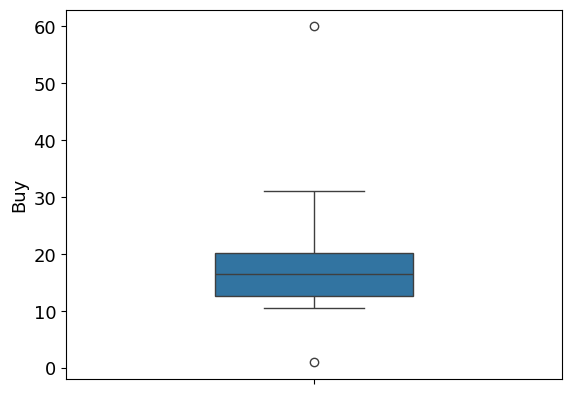

In [515]:
sns.boxplot(df.Buy, width=0.4)
plt.show()

<Axes: ylabel='Buy'>

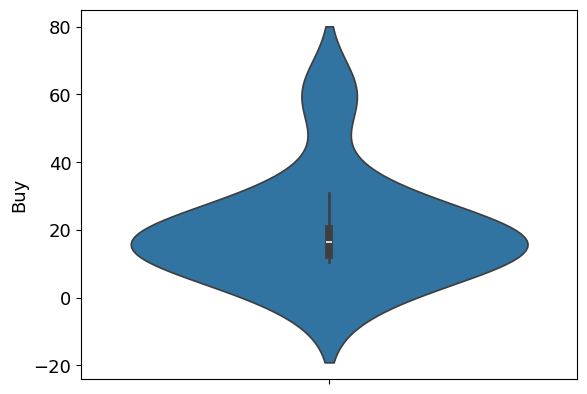

In [516]:
sns.violinplot(df.Buy)

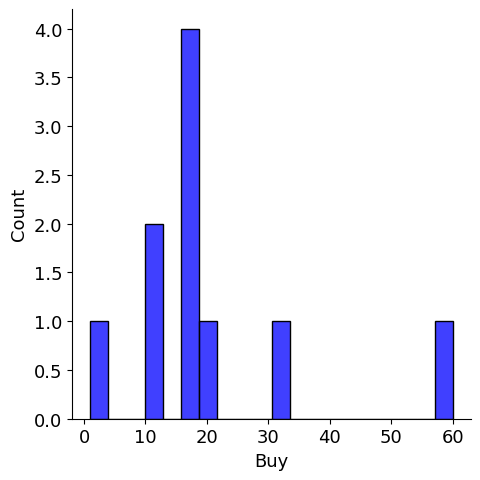

In [517]:
sns.displot(df.Buy, kde=False, bins=20, color='b')
plt.show()

In [518]:
# ws03

q3 = df.Buy.quantile(.75)
q1 = df.Buy.quantile(.25)

# q1, q3= np.percentile(df.Buy, [25,75])

iqr = q3 - q1

print('Q1: {}' . format(q1))
print('Q3: {}' . format(q3))
print('IQR: {}' . format(iqr))

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
print('Lower: {:.2f} \nUpper: {:.2f}' . format(lower, upper))

Q1: 12.625
Q3: 20.25
IQR: 7.625
Lower: 1.19 
Upper: 31.69


C:\Users\ASUS\AppData\Local\Temp\ipykernel_31112\3022164835.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df.Buy, width=0.4, palette='Set2')


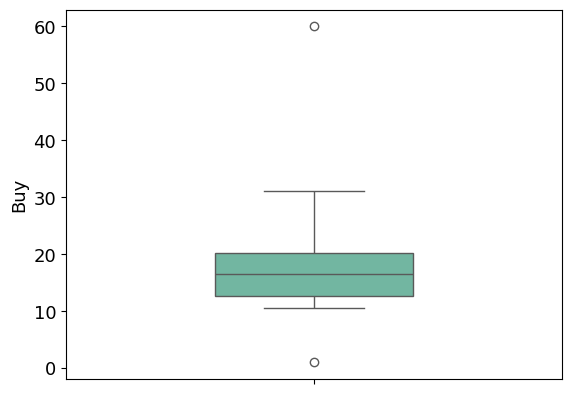

In [519]:
# ws04
plt.axvline(x=q1, c='b', linestyle='--', linewidth=1) #
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1) #
plt.axvline(x=lower, c='r', linestyle='--') #
plt.axvline(x=upper, c='r', linestyle='--') #
sns.boxplot(df.Buy, width=0.4, palette='Set2')
plt.show()

In [520]:
# ws05
df[df.Buy > upper].Buy.count()
df[df.Buy > upper].count()

Name       1
Age        1
Buy        1
Section    1
dtype: int64

In [521]:
filter = df.Buy > upper
df[filter] 

,Name,Age,Buy,Section
8,White,25,60.00,1


In [522]:
df.shape

(10, 4)

In [523]:
df.drop(df[filter].index, inplace=True)
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
7,Bash,26,1.00,2
9,Bob,28,21.00,2


In [524]:
df = df[df.Buy <= upper]
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
7,Bash,26,1.00,2
9,Bob,28,21.00,2


In [525]:
df.shape

(9, 4)

In [526]:
# ws06
df[df.Buy < lower].count()

Name       1
Age        1
Buy        1
Section    1
dtype: int64

In [527]:
filter = df.Buy < lower
df[filter] 

,Name,Age,Buy,Section
7,Bash,26,1.00,2


In [528]:
df = df[df.Buy >= lower]  # 
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
9,Bob,28,21.00,2


In [529]:
(df.Buy < lower ) | (df.Buy > upper)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
9    False
Name: Buy, dtype: bool

In [530]:

df[(df.Buy < lower) | (df.Buy > upper)]


,Name,Age,Buy,Section


In [531]:
df[(df.Buy <= upper) & (df.Buy >= lower)]

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
9,Bob,28,21.00,2


In [532]:

df = df[(df.Buy <= upper) & (df.Buy >= lower)]
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
9,Bob,28,21.00,2


In [533]:
df[(df.Buy <= upper) & (df.Buy >= lower)].count()

Name       8
Age        8
Buy        8
Section    8
dtype: int64

In [534]:
df.dtypes

Name         object
Age           int64
Buy         float64
Section    category
dtype: object

In [535]:
df.shape

(8, 4)

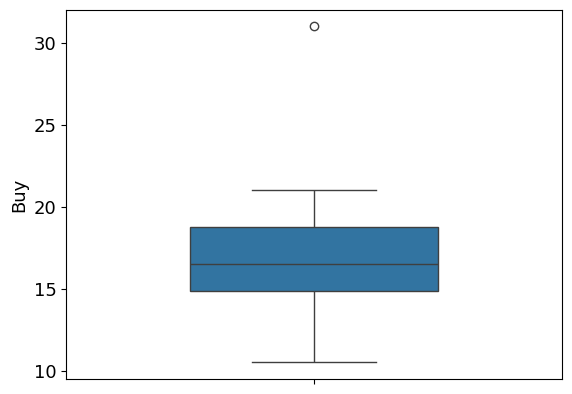

In [536]:
# ws07
sns.boxplot(df.Buy, width=0.5)
plt.show()

In [537]:
df.describe()

,Age,Buy
count,8.00,8.00
mean,26.75,17.62
std,4.06,6.37
min,22.00,10.50
25%,24.50,14.88
50%,26.50,16.50
75%,28.00,18.75
max,35.00,31.00


In [538]:
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
9,Bob,28,21.00,2


In [539]:
# ws08 Z-score
import numpy as np

lst = [5, 6, 8, 9, 10, 7.6]

mean = np.mean(lst)
std = np.std(lst, ddof=0)
print('mean :', mean)
print('std :', std)

def z_score(x, m, s):
    return (x - m) / s

for i in lst:
    z = z_score(x=i, m=mean, s=std)
    print (round(z, 4))

mean : 7.6000000000000005
std : 1.6931233465600393
-1.5356
-0.945
0.2362
0.8269
1.4175
-0.0


In [540]:
# ws09
from scipy.stats import zscore

lst = [5, 6, 8, 9, 10, 7.6]

zsc = zscore(lst, ddof=0)
for i in zsc:
    print(round(i, 4))


-1.5356
-0.945
0.2362
0.8269
1.4175
-0.0


In [541]:
# ws10 
uri = 'data/outlier_univar.csv'
df = pd.read_csv(uri)
df.head()
# df.tail(10)
df.Section = df.Section.astype('category')
df.sample(5)
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
7,Bash,26,1.00,2
8,White,25,60.00,1
9,Bob,28,21.00,2


In [542]:
df.describe()

,Age,Buy
count,10.00,10.00
mean,26.50,20.20
std,3.63,15.95
min,22.00,1.00
25%,25.00,12.62
50%,25.50,16.50
75%,28.00,20.25
max,35.00,60.00


In [543]:
zscore(df.Buy, ddof=0)

0   -0.15
1   -0.28
2   -0.57
3   -0.64
4   -0.21
5   -0.28
6    0.71
7   -1.27
8    2.63
9    0.05
Name: Buy, dtype: float64

In [544]:
from scipy.stats import zscore
df['zscore'] = zscore(df.Buy,ddof=0)
df

,Name,Age,Buy,Section,zscore
0,Kobkiat,25,18.00,1,-0.15
1,Ninan,22,16.00,1,-0.28
2,John,25,11.50,2,-0.57
3,Tim,35,10.50,2,-0.64
4,Steal,28,17.00,1,-0.21
5,Mark,28,16.00,2,-0.28
6,Dang,23,31.00,1,0.71
7,Bash,26,1.00,2,-1.27
8,White,25,60.00,1,2.63
9,Bob,28,21.00,2,0.05


In [545]:
df.describe()

,Age,Buy,zscore
count,10.00,10.00,10.00
mean,26.50,20.20,0.00
std,3.63,15.95,1.05
min,22.00,1.00,-1.27
25%,25.00,12.62,-0.50
50%,25.50,16.50,-0.24
75%,28.00,20.25,0.00
max,35.00,60.00,2.63


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


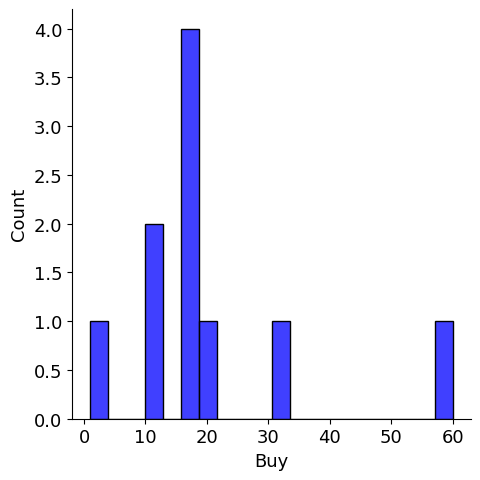

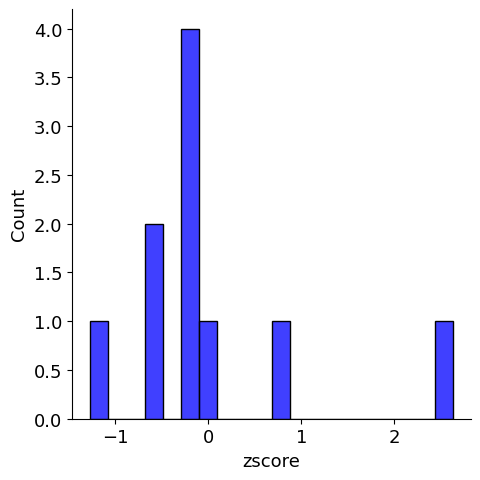

In [546]:
#f, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.displot(df.Buy,bins=20, ax=axes[0], color='b')
sns.displot(df.zscore,bins=20, ax=axes[1], color='b')
plt.show()
plt.show()

In [547]:
threshold = 2.5
# df['outlier'] = df.zscore.apply(lambda x : x <= -threshold or x >= threshold )

df['outlier'] = df.zscore.apply(lambda x : (np.abs(x) >= threshold) )

In [548]:
df

,Name,Age,Buy,Section,zscore,outlier
0,Kobkiat,25,18.00,1,-0.15,False
1,Ninan,22,16.00,1,-0.28,False
2,John,25,11.50,2,-0.57,False
3,Tim,35,10.50,2,-0.64,False
4,Steal,28,17.00,1,-0.21,False
5,Mark,28,16.00,2,-0.28,False
6,Dang,23,31.00,1,0.71,False
7,Bash,26,1.00,2,-1.27,False
8,White,25,60.00,1,2.63,True
9,Bob,28,21.00,2,0.05,False


In [549]:
df[df.outlier == True]

,Name,Age,Buy,Section,zscore,outlier
8,White,25,60.00,1,2.63,True


In [550]:
df[df.outlier == False]

,Name,Age,Buy,Section,zscore,outlier
0,Kobkiat,25,18.00,1,-0.15,False
1,Ninan,22,16.00,1,-0.28,False
2,John,25,11.50,2,-0.57,False
3,Tim,35,10.50,2,-0.64,False
4,Steal,28,17.00,1,-0.21,False
5,Mark,28,16.00,2,-0.28,False
6,Dang,23,31.00,1,0.71,False
7,Bash,26,1.00,2,-1.27,False
9,Bob,28,21.00,2,0.05,False


In [551]:
# filter both
filter = np.abs(df.zscore) <= threshold
df = df[filter]
df

,Name,Age,Buy,Section,zscore,outlier
0,Kobkiat,25,18.00,1,-0.15,False
1,Ninan,22,16.00,1,-0.28,False
2,John,25,11.50,2,-0.57,False
3,Tim,35,10.50,2,-0.64,False
4,Steal,28,17.00,1,-0.21,False
5,Mark,28,16.00,2,-0.28,False
6,Dang,23,31.00,1,0.71,False
7,Bash,26,1.00,2,-1.27,False
9,Bob,28,21.00,2,0.05,False


In [552]:
filter = df.outlier == True
df[filter]

,Name,Age,Buy,Section,zscore,outlier


In [553]:
df[filter].index

Index([], dtype='int64')

In [554]:
# df.drop(df[filter].index ,inplace=True)
df = df[df.outlier == False]
df

,Name,Age,Buy,Section,zscore,outlier
0,Kobkiat,25,18.00,1,-0.15,False
1,Ninan,22,16.00,1,-0.28,False
2,John,25,11.50,2,-0.57,False
3,Tim,35,10.50,2,-0.64,False
4,Steal,28,17.00,1,-0.21,False
5,Mark,28,16.00,2,-0.28,False
6,Dang,23,31.00,1,0.71,False
7,Bash,26,1.00,2,-1.27,False
9,Bob,28,21.00,2,0.05,False


In [555]:
df.shape

(9, 6)

In [556]:
df

,Name,Age,Buy,Section,zscore,outlier
0,Kobkiat,25,18.00,1,-0.15,False
1,Ninan,22,16.00,1,-0.28,False
2,John,25,11.50,2,-0.57,False
3,Tim,35,10.50,2,-0.64,False
4,Steal,28,17.00,1,-0.21,False
5,Mark,28,16.00,2,-0.28,False
6,Dang,23,31.00,1,0.71,False
7,Bash,26,1.00,2,-1.27,False
9,Bob,28,21.00,2,0.05,False


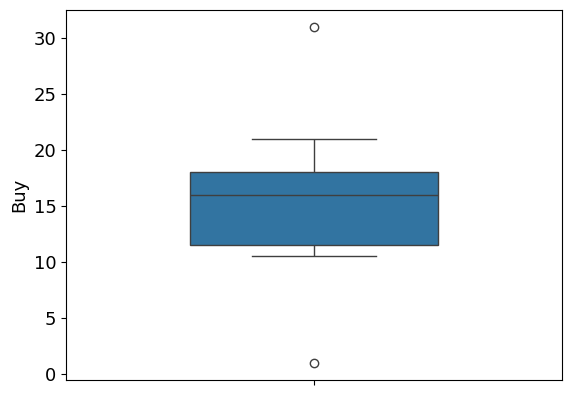

In [557]:
sns.boxplot(df.Buy, width=0.5)
plt.show()

In [558]:
df.describe()

,Age,Buy,zscore
count,9.00,9.00,9.00
mean,26.67,15.78,-0.29
std,3.81,8.14,0.54
min,22.00,1.00,-1.27
25%,25.00,11.50,-0.57
50%,26.00,16.00,-0.28
75%,28.00,18.00,-0.15
max,35.00,31.00,0.71


In [559]:
df.drop(columns=['zscore','outlier'],inplace=True)
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
7,Bash,26,1.00,2
9,Bob,28,21.00,2
